In [49]:
import pandas as pd
import matplotlib.pyplot as plt

#read the data
df = pd.read_csv('US-pumpkins.csv')
df = df[df['Package'].str.contains('bushel', case=True, regex=True)]

df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [50]:
df.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [51]:
# Select relevant columns
new_col = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
df = df.loc[:, new_col]

# Calculate price
price = (df['Low Price'] + df['High Price']) / 2

# Extract month and day of year
month = pd.to_datetime(df['Date']).dt.month
day_of_year = pd.to_datetime(df['Date']).dt.dayofyear

# Create new DataFrame
N_df = pd.DataFrame(
    {
        'month': month,
        'day_of_year': day_of_year,
        'price': price,
        'low_price': df['Low Price'],
        'high_price': df['High Price'],
        'package': df['Package'],  
        'variety': df['Variety'], 
        'city_name': df['City Name']
    }
)
N_df.loc[df['Package'].str.contains('1 1/9'), 'Price'] = price / 1.1
N_df.loc[df['Package'].str.contains('1/2'), 'Price'] = price * 2

print(N_df)

      month  day_of_year   price  low_price  high_price               package  \
70        9          268  15.000      15.00        15.0  1 1/9 bushel cartons   
71        9          268  18.000      18.00        18.0  1 1/9 bushel cartons   
72       10          275  18.000      18.00        18.0  1 1/9 bushel cartons   
73       10          275  17.000      17.00        17.0  1 1/9 bushel cartons   
74       10          282  15.000      15.00        15.0  1 1/9 bushel cartons   
...     ...          ...     ...        ...         ...                   ...   
1738      9          274  15.000      15.00        15.0    1/2 bushel cartons   
1739      9          274  14.375      13.75        15.0    1/2 bushel cartons   
1740      9          274  12.875      10.75        15.0    1/2 bushel cartons   
1741      9          274  12.000      12.00        12.0    1/2 bushel cartons   
1742      9          274  12.000      12.00        12.0    1/2 bushel cartons   

        variety  city_name 

C:\Users\david\AppData\Local\Temp\ipykernel_15136\3201526771.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  month = pd.to_datetime(df['Date']).dt.month
C:\Users\david\AppData\Local\Temp\ipykernel_15136\3201526771.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(df['Date']).dt.dayofyear


Text(0.5, 0, 'month')

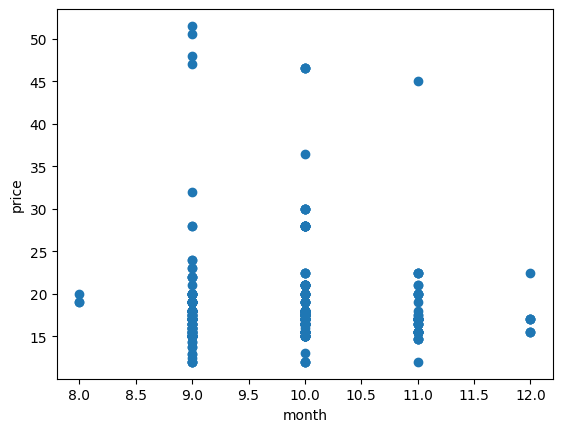

In [52]:

plt.scatter(N_df['month'], N_df['price'])
plt.ylabel('price')
plt.xlabel("month")

Text(0.5, 0, 'day of year')

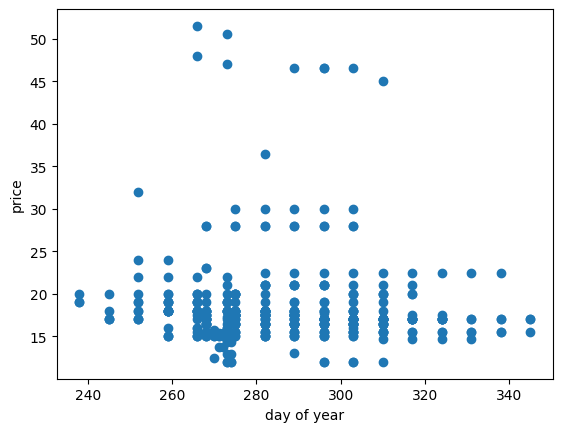

In [53]:
plt.scatter(N_df['day_of_year'], N_df['price'])
plt.ylabel('price')
plt.xlabel("day of year")